In [1]:
from keypoint_dataset import KeypointDataset
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [2]:
datasetPath = "/home/giorgio6846/Code/Sign-AI/data/dataset.hdf5"
kd = KeypointDataset(datasetPath, return_label=True)

In [3]:
len(kd)

12224

In [ ]:
keypoints = kd[4000][0]

In [17]:
minValue = 999999
maxValue = -99999

for idx in range(len(kd)):
    keypoints_frames = kd[idx][0].shape[0]
    minValue = min(keypoints_frames, minValue)
    maxValue = max(keypoints_frames, maxValue)

print(minValue)
print(maxValue)

5
3120


In [16]:
keypoints.shape[0]

222

Text(0.5, 1.0, 'Frame 0')

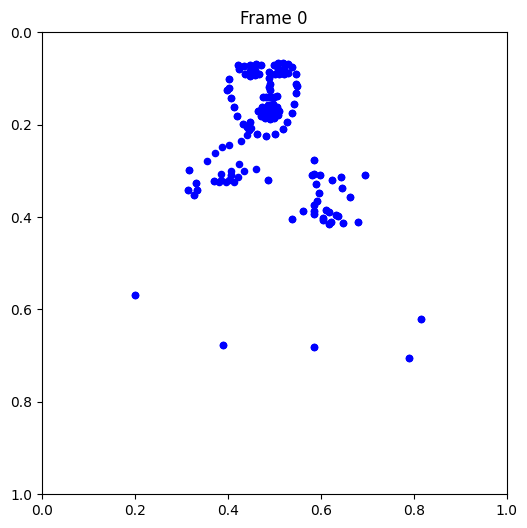

In [13]:
fig, ax = plt.subplots(figsize=(6, 6))
scat = ax.scatter(keypoints[0, :, 0], keypoints[0, :, 1], s=20, c='blue')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.invert_yaxis()
ax.set_title("Frame 0")

In [14]:
def update(frame_index):
    points = keypoints[frame_index]       # [250, 2]
    scat.set_offsets(points)           # Move every scatter point to new coords
    ax.set_title(f"Frame {frame_index}")
    return (scat,)

In [15]:
anim = FuncAnimation(
    fig,
    update,
    frames=keypoints.shape[0],  # 148
    interval=50,             # 50 ms between frames (≈20 FPS)
    blit=True
)
HTML(anim.to_jshtml())
